# Normal Poseidon Inputs

Just for simplicity, we define a hot jupiter composed of only H and He in order to display the effects of Mie Scattering

In [1]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J, M_J
import scipy.constants as sc

#***** Define stellar properties *****#

R_s = 1.49*R_Sun     # Stellar radius (m)
T_s = 6550            # Stellar effective temperature (K)
Met_s = -0.25          # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.2        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s)

#***** Define planet properties *****#

planet_name = 'Mie_Testing'  # Planet name used for plots, output files etc.

R_p = 1.87*R_J                           # Planetary radius (m)
R_p = 1.722*R_J
M_p = 0.78*M_J
# Formula : a = GM/R^2
g_p = (sc.G*M_p)/(R_p**2)         # Gravitational field of planet (m/s^2)
T_eq = 1447

# Create the planet object
planet = create_planet(planet_name, R_p, gravity = g_p, T_eq = T_eq)

CB_color_cycle = ['#0072B2', '#009E73', '#D55E00', '#CC79A7',
                 '#F0E442', '#56B4E9','#56B4E9']



wl_min = 0.2    # Minimum wavelength (um)
wl_max = 13      # Maximum wavelength (um)
R = 1000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

/Users/elijahmullens/Desktop/POSEIDON-V1-1/POSEIDON/absorption.py:1495: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def store_Rayleigh_eta_LBL(wl_model, chemical_species):


# Different Models

In [2]:
from POSEIDON.core import define_model

#***** Define model *****#

model_1_name = 'Fuzzy_Deck_SiO2'
model_2_name = 'Slab_SiO2'
model_3_name = 'Uniform_X_SiO2'
model_4_name = 'Slabs_SiO2_MgSiO3'
model_5_name = 'Opaque_Deck_Plus_Slabs_SiO2_MgSiO3'
model_6_name = 'Fuzzy_Deck_Plus_Slabs_Fe_SiO2_MgSiO3'

bulk_species = ['H2', 'He']      # H2 + He comprises the bulk atmosphere
param_species = []

aerosol_species = ['SiO2']

# Create the model objects
model_1 = define_model(model_1_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'fuzzy_deck',
                     aerosol_species = aerosol_species)

model_2 = define_model(model_2_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'slab',
                     aerosol_species = aerosol_species)

model_3 = define_model(model_3_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'uniform_X',
                     aerosol_species = aerosol_species)

aerosol_species = ['SiO2', 'MgSiO3']

model_4 = define_model(model_4_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'slab',
                     aerosol_species = aerosol_species)

model_5 = define_model(model_5_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'opaque_deck_plus_slab',
                     aerosol_species = aerosol_species)

aerosol_species = ['Fe','SiO2', 'MgSiO3']

model_6 = define_model(model_5_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'fuzzy_deck_plus_slab',
                     aerosol_species = aerosol_species)

# Check the free parameters defining this model
print()
print("Cloud parameters model 1: " + str(model_1['cloud_param_names']))
print("Cloud parameters model 2: " + str(model_2['cloud_param_names']))
print("Cloud parameters model 3: " + str(model_3['cloud_param_names']))
print("Cloud parameters model 4: " + str(model_4['cloud_param_names']))
print("Cloud parameters model 5: " + str(model_5['cloud_param_names']))
print("Cloud parameters model 6: " + str(model_6['cloud_param_names']))

Reading in database for aerosol cross sections...
Reading in database for aerosol cross sections...
Reading in database for aerosol cross sections...
Reading in database for aerosol cross sections...
Reading in database for aerosol cross sections...
This mode assumes that the first aerosol in the list is the deck species, rest are slab species
Reading in database for aerosol cross sections...

Cloud parameters model 1: ['log_P_top_deck_SiO2' 'log_r_m_SiO2' 'log_n_max_SiO2' 'f_SiO2']
Cloud parameters model 2: ['log_P_top_slab_SiO2' 'Delta_log_P_SiO2' 'log_r_m_SiO2' 'log_X_SiO2']
Cloud parameters model 3: ['log_r_m_SiO2' 'log_X_SiO2']
Cloud parameters model 4: ['log_P_top_slab_SiO2' 'Delta_log_P_SiO2' 'log_r_m_SiO2' 'log_X_SiO2'
 'log_P_top_slab_MgSiO3' 'Delta_log_P_MgSiO3' 'log_r_m_MgSiO3'
 'log_X_MgSiO3']
Cloud parameters model 5: ['log_P_top_deck' 'log_P_top_slab_SiO2' 'Delta_log_P_SiO2' 'log_r_m_SiO2'
 'log_X_SiO2' 'log_P_top_slab_MgSiO3' 'Delta_log_P_MgSiO3'
 'log_r_m_MgSiO3' 'log_X

In [3]:
# File read, and constant refractive index 

model_7_name = 'Fuzzy_Deck_File_Read'
model_8_name = 'Slab_File_read'
model_9_name = 'Uniform_X_File_read'
model_10_name = 'Opaque_Deck_Plus_Slab_File_read'

aerosol_species = ['file_read']

# Create the model object
model_7 = define_model(model_7_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'fuzzy_deck',
                     aerosol_species = aerosol_species)

model_8 = define_model(model_8_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'slab',
                     aerosol_species = aerosol_species)

model_9 = define_model(model_9_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'uniform_X',
                     aerosol_species = aerosol_species)

model_10 = define_model(model_10_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'opaque_deck_plus_slab',
                     aerosol_species = aerosol_species)

print()
# Check the free parameters defining this model
print("Cloud parameters model 7: " + str(model_7['cloud_param_names']))
print("Cloud parameters model 8: " + str(model_8['cloud_param_names']))
print("Cloud parameters model 9: " + str(model_9['cloud_param_names']))
print("Cloud parameters model 10: " + str(model_10['cloud_param_names']))

Only one slab can be defined with free or file_read
Only one slab can be defined with free or file_read

Cloud parameters model 7: ['log_P_top_deck' 'log_r_m' 'log_n_max' 'f' 'r_i_real' 'r_i_complex']
Cloud parameters model 8: ['log_P_top_slab' 'Delta_log_P' 'log_r_m' 'log_X_Mie' 'r_i_real'
 'r_i_complex']
Cloud parameters model 9: ['log_r_m' 'log_X_Mie' 'r_i_real' 'r_i_complex']
Cloud parameters model 10: ['log_P_top_deck' 'log_P_top_slab' 'Delta_log_P' 'log_r_m' 'log_X_Mie'
 'r_i_real' 'r_i_complex']


In [4]:
# File read, and constant refractive index 

model_11_name = 'Fuzzy_Deck_Free'
model_12_name = 'Slab_Free'
model_13_name = 'Uniform_X_Free'
model_14_name = 'Opaque_Deck_Plus_Slab_Free'

aerosol_species = ['free']

# Create the model object
model_11 = define_model(model_11_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'fuzzy_deck',
                     aerosol_species = aerosol_species)

model_12 = define_model(model_12_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'slab',
                     aerosol_species = aerosol_species)

model_13 = define_model(model_13_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'uniform_X',
                     aerosol_species = aerosol_species)

model_14 = define_model(model_14_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'opaque_deck_plus_slab',
                     aerosol_species = aerosol_species)

print()
print("Cloud parameters model 11: " + str(model_11['cloud_param_names']))
print("Cloud parameters model 12: " + str(model_12['cloud_param_names']))
print("Cloud parameters model 13: " + str(model_13['cloud_param_names']))
print("Cloud parameters model 14: " + str(model_14['cloud_param_names']))

Only one slab can be defined with free or file_read
Only one slab can be defined with free or file_read

Cloud parameters model 11: ['log_P_top_deck' 'log_r_m' 'log_n_max' 'f' 'r_i_real' 'r_i_complex']
Cloud parameters model 12: ['log_P_top_slab' 'Delta_log_P' 'log_r_m' 'log_X_Mie' 'r_i_real'
 'r_i_complex']
Cloud parameters model 13: ['log_r_m' 'log_X_Mie' 'r_i_real' 'r_i_complex']
Cloud parameters model 14: ['log_P_top_deck' 'log_P_top_slab' 'Delta_log_P' 'log_r_m' 'log_X_Mie'
 'r_i_real' 'r_i_complex']


In [16]:
from POSEIDON.utility import read_chem_file
from POSEIDON.core import make_atmosphere
import numpy as np
import matplotlib.pyplot as plt

# Specify the pressure grid of the atmosphere
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# We'll space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure and radius
P_ref = 10.0   # Reference pressure (bar)
R_p_ref = R_p # Radius at reference pressure

# Shared Parameters
PT_params = np.array([1200])
log_X_params = np.array([])

# Cloud Parameters 
log_P_top_deck_SiO2 = 1
log_r_m_SiO2        = -2
log_n_max_SiO2      = 20
f_SiO2              = 0.3

cloud_params = ([log_P_top_deck_SiO2,log_r_m_SiO2,log_n_max_SiO2,f_SiO2])
atmosphere_1 = make_atmosphere(planet, model_1, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

log_P_top_slab_SiO2 = -5
Delta_log_P_SiO2    = 1
log_X_SiO2          = -13

cloud_params = ([log_P_top_slab_SiO2,Delta_log_P_SiO2,log_r_m_SiO2,log_X_SiO2])
atmosphere_2 = make_atmosphere(planet, model_2, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

cloud_params = ([log_r_m_SiO2,log_X_SiO2])
atmosphere_3 = make_atmosphere(planet, model_3, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

log_P_top_slab_MgSiO3 = - 2
Delta_log_P_MgSiO3    = 1
log_r_m_MgSiO3        = -2
log_X_MgSiO3          = -13

cloud_params = ([log_P_top_slab_SiO2, Delta_log_P_SiO2, log_r_m_SiO2, log_X_SiO2, 
                 log_P_top_slab_MgSiO3, Delta_log_P_MgSiO3, log_r_m_MgSiO3,log_X_MgSiO3])
atmosphere_4 = make_atmosphere(planet, model_4, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

log_P_top_deck        = 1

cloud_params = ([log_P_top_deck,
                 log_P_top_slab_SiO2,Delta_log_P_SiO2,log_r_m_SiO2,log_X_SiO2,
                 log_P_top_slab_MgSiO3,Delta_log_P_MgSiO3, log_r_m_MgSiO3,log_X_MgSiO3])
atmosphere_5 = make_atmosphere(planet, model_5, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

log_P_top_deck_Fe     = 1
log_r_m_Fe            = -2
log_n_max_Fe          = 20
f_Fe                  = 0.3


cloud_params = ([log_P_top_deck_Fe,log_r_m_Fe,log_n_max_Fe,f_Fe,
                 log_P_top_slab_SiO2,Delta_log_P_SiO2,log_r_m_SiO2,log_X_SiO2,
                 log_P_top_slab_MgSiO3,Delta_log_P_MgSiO3,log_r_m_MgSiO3,log_X_MgSiO3])
atmosphere_6 = make_atmosphere(planet, model_6, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)


In [6]:
from POSEIDON.clouds_make_database import load_refractive_indices_from_file

# Testing the file_read and free 
# Preload the refractive indices from the file 
file_name = './H2O_complex.txt'
r_i_real, r_i_complex = load_refractive_indices_from_file(wl, file_name)

log_P_top_deck     = 0
log_r_m            = -2
log_n_max          = 20
f                  = 0.3

log_P_top_slab     = -5
Delta_log_P        = 1
log_X_Mie          = -10

cloud_params = ([log_P_top_deck,log_r_m,log_n_max,f,r_i_real,r_i_complex])
atmosphere_7 = make_atmosphere(planet, model_7, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

cloud_params = ([log_P_top_slab, Delta_log_P, log_r_m, log_X_Mie, r_i_real, r_i_complex])
atmosphere_8 = make_atmosphere(planet, model_8, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

cloud_params = ([log_r_m, log_X_Mie, r_i_real, r_i_complex])
atmosphere_9 = make_atmosphere(planet, model_9, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

cloud_params = ([log_P_top_deck,log_P_top_slab, Delta_log_P, log_r_m, log_X_Mie, r_i_real, r_i_complex])
atmosphere_10 = make_atmosphere(planet, model_10, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

In [7]:
r_i_real, r_i_complex = 1, 1e-8

log_P_top_deck     = 0
log_r_m            = -2
log_n_max          = 20
f                  = 0.3

log_P_top_slab     = -5
Delta_log_P        = 1
log_X_Mie          = -10

cloud_params = ([log_P_top_deck,log_r_m,log_n_max,f,r_i_real,r_i_complex])
atmosphere_11 = make_atmosphere(planet, model_11, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

cloud_params = ([log_P_top_slab, Delta_log_P, log_r_m, log_X_Mie, r_i_real, r_i_complex])
atmosphere_12 = make_atmosphere(planet, model_12, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

cloud_params = ([log_r_m, log_X_Mie, r_i_real, r_i_complex])
atmosphere_13 = make_atmosphere(planet, model_13, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

cloud_params = ([log_P_top_deck,log_P_top_slab, Delta_log_P, log_r_m, log_X_Mie, r_i_real, r_i_complex])
atmosphere_14 = make_atmosphere(planet, model_14, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

In [8]:
atmosphere = atmosphere_9
P_cloud = atmosphere['P_cloud']
r_m = atmosphere['r_m']
log_n_max = atmosphere['log_n_max']
fractional_scale_height = atmosphere['fractional_scale_height']
aerosol_species = atmosphere['aerosol_species']
r_i_real = atmosphere['r_i_real']
r_i_complex = atmosphere['r_i_complex']
log_X_Mie = atmosphere['log_X_Mie']
P_cloud_bottom = atmosphere['P_cloud_bottom']

print(type(P_cloud))
print(r_m)
print(log_n_max)
print(fractional_scale_height)
print(aerosol_species)
print(r_i_real)
print(r_i_complex)
print(log_X_Mie)
print(P_cloud_bottom)

<class 'float'>
0.01
0
0
['file_read']
[1.396      1.39581585 1.39563151 ... 1.1448048  1.1454021  1.146     ]
[1.10000000e-07 1.09511594e-07 1.09022698e-07 ... 3.02609597e-01
 3.03804201e-01 3.05000000e-01]
-10
100.0


In [9]:
from POSEIDON.core import read_opacities, wl_grid_constant_R

wl_min = 0.2    # Minimum wavelength (um)
wl_max = 13      # Maximum wavelength (um)
R = 100       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# First, specify limits of the fine temperature and pressure grids for the 
# pre-interpolation of cross sections. These fine grids should cover a
# wide range of possible temperatures and pressures for the model atmosphere.

# Define fine temperature grid (K)
T_fine_min = 400     # 400 K lower limit suffices for a typical hot Jupiter
T_fine_max = 2000    # 2000 K upper limit suffices for a typical hot Jupiter
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

# Now we can pre-interpolate the sampled opacities (may take up to a minute)
opac = read_opacities(model_1, wl, opacity_treatment, T_fine, log_P_fine)

Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
Opacity pre-interpolation complete.


In [17]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection


# Generate our first transmission spectrum
spectrum_1 = compute_spectrum(planet, star, model_1, atmosphere_1, opac, wl,
                            spectrum_type = 'transmission')

spectrum_2 = compute_spectrum(planet, star, model_2, atmosphere_2, opac, wl,
                            spectrum_type = 'transmission')

spectrum_3 = compute_spectrum(planet, star, model_3, atmosphere_3, opac, wl,
                            spectrum_type = 'transmission')

spectrum_4 = compute_spectrum(planet, star, model_4, atmosphere_4, opac, wl,
                            spectrum_type = 'transmission')

spectrum_5 = compute_spectrum(planet, star, model_5, atmosphere_5, opac, wl,
                            spectrum_type = 'transmission')

spectrum_6 = compute_spectrum(planet, star, model_6, atmosphere_6, opac, wl,
                            spectrum_type = 'transmission')


Opaque cloud time!
1
1e+250
1e+250
1e+250
1e+250
1e+250
1e+250
1e+250
1e+250
1e+250
1e+250
1e+250
1.6198070676016166e-19
1.2798826730868333e-19
1.0041595165583754e-19
7.805119635354928e-20
5.991045380479613e-20
4.519593823008418e-20
3.326054098730029e-20
2.3579372305956024e-20
1.5726677910442168e-20
9.357115381471485e-21
4.190566835580643e-21
1.0863173951963271e-08
8.81145531266886e-09
7.147243068231294e-09
5.797349207790276e-09
4.702408679292863e-09
3.8142686587474555e-09
3.09387090602489e-09
2.5095340783600116e-09
2.0355604618751857e-09
1.6511058485634592e-09
1.33926285866699e-09
1.086317395196327e-09
8.811455312668858e-10
7.147243068231288e-10
5.797349207790278e-10
4.702408679292863e-10
3.8142686587474555e-10
3.09387090602489e-10
2.509534078360009e-10
2.0355604618751859e-10
1.651105848563459e-10
1.3392628586669903e-10
1.0863173951963272e-10
8.81145531266886e-11
7.147243068231294e-11
5.797349207790283e-11
4.702408679292867e-11
3.8142686587474524e-11
3.093870906024887e-11
2.5095340783

In [11]:
spectrum_7 = compute_spectrum(planet, star, model_7, atmosphere_7, opac, wl,
                            spectrum_type = 'transmission')

spectrum_8 = compute_spectrum(planet, star, model_8, atmosphere_8, opac, wl,
                            spectrum_type = 'transmission')

spectrum_9 = compute_spectrum(planet, star, model_9, atmosphere_9, opac, wl,
                            spectrum_type = 'transmission')

spectrum_10 = compute_spectrum(planet, star, model_10, atmosphere_10, opac, wl,
                            spectrum_type = 'transmission')

In [12]:
spectrum_11 = compute_spectrum(planet, star, model_11, atmosphere_11, opac, wl,
                            spectrum_type = 'transmission')

spectrum_12 = compute_spectrum(planet, star, model_12, atmosphere_12, opac, wl,
                            spectrum_type = 'transmission')

spectrum_13 = compute_spectrum(planet, star, model_13, atmosphere_13, opac, wl,
                            spectrum_type = 'transmission')

spectrum_14 = compute_spectrum(planet, star, model_14, atmosphere_14, opac, wl,
                            spectrum_type = 'transmission')

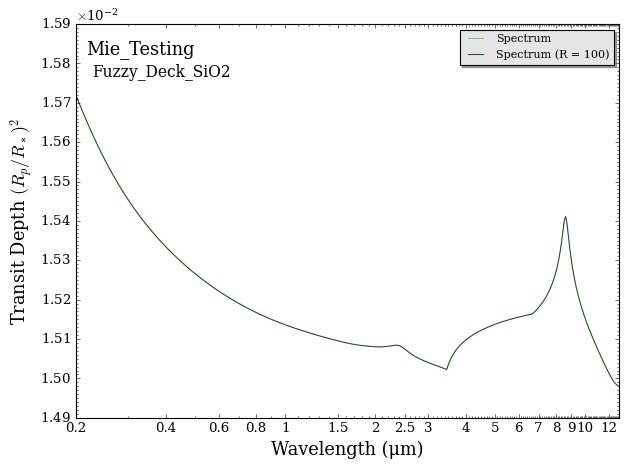

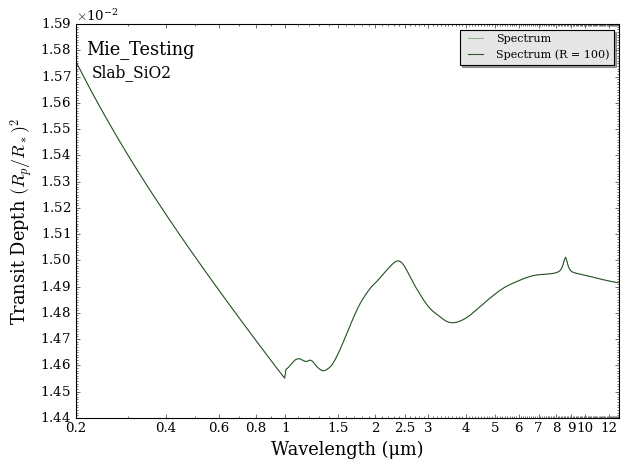

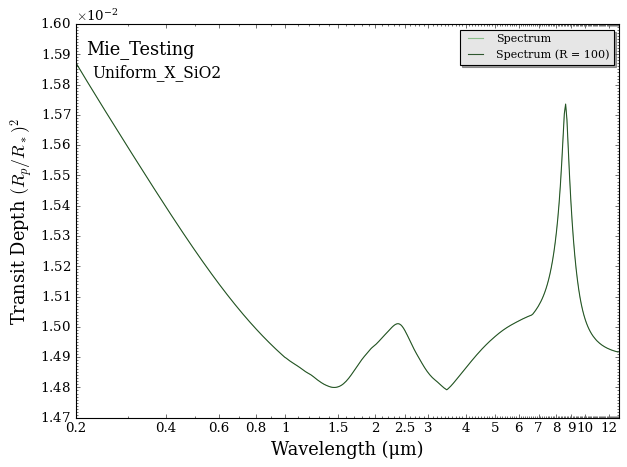

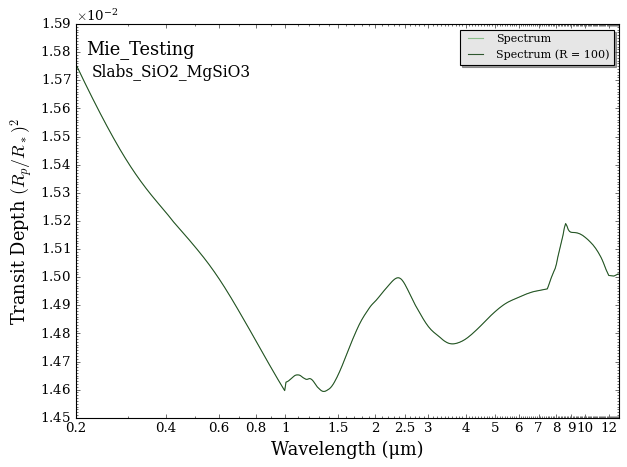

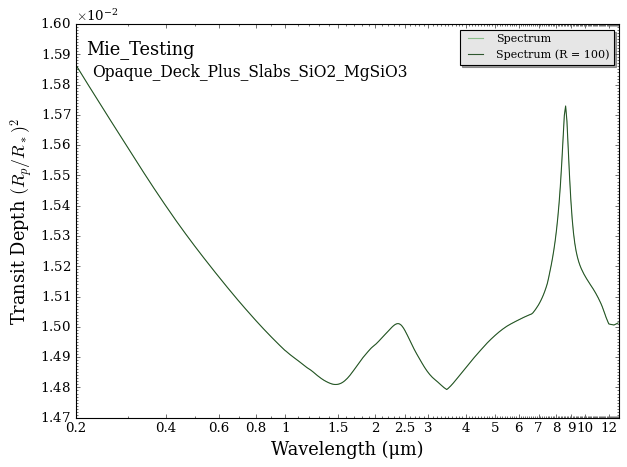

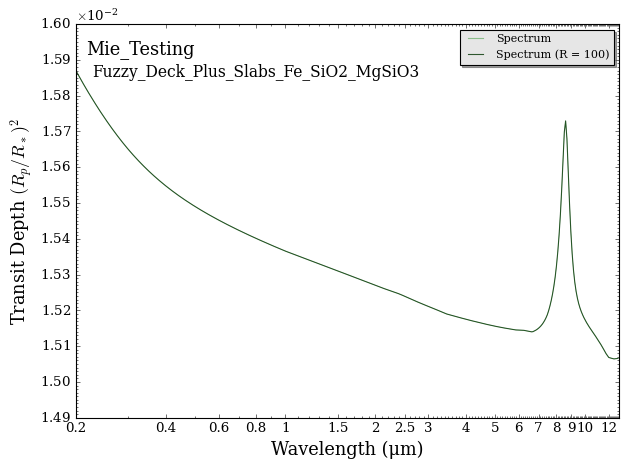

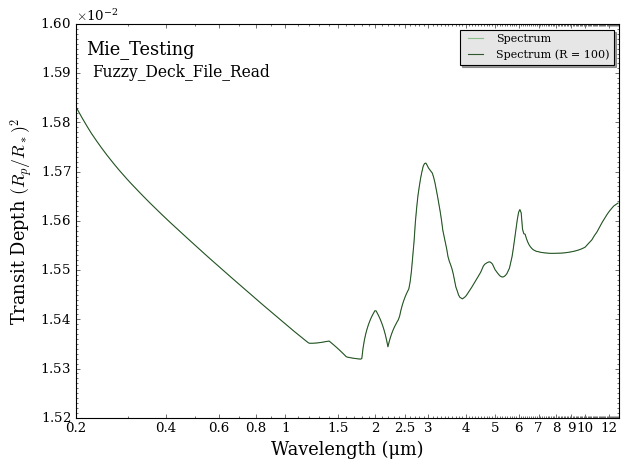

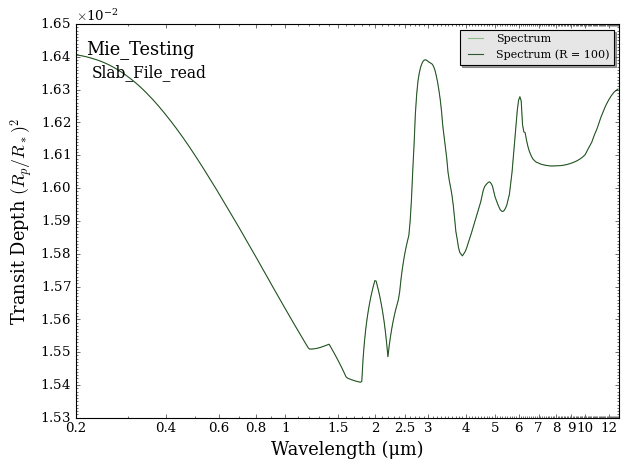

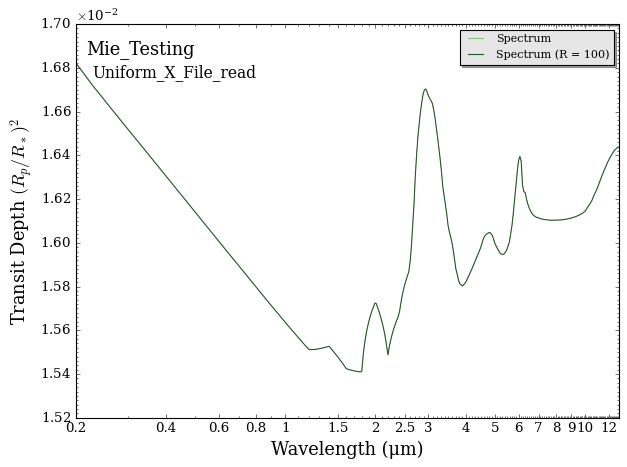

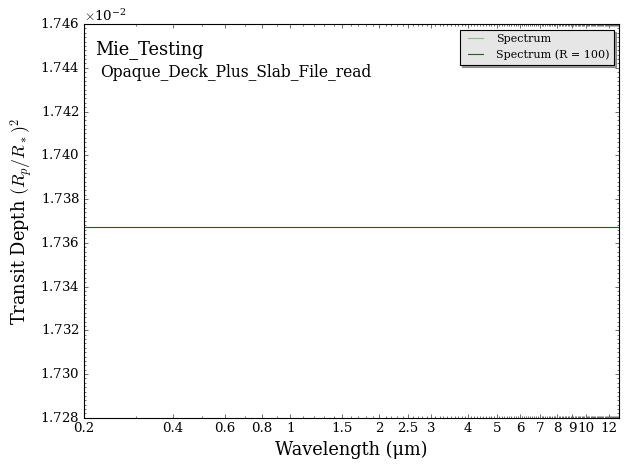

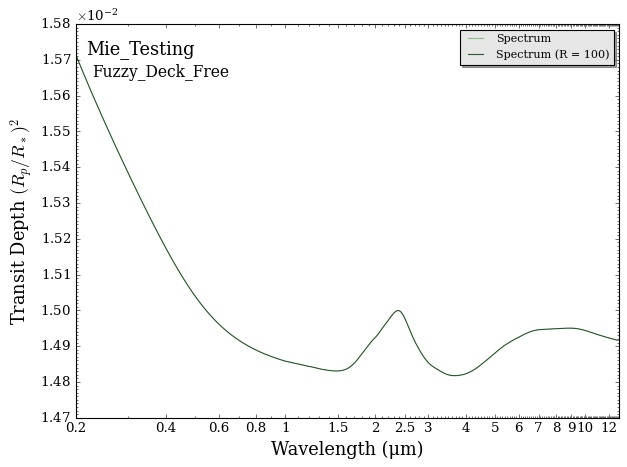

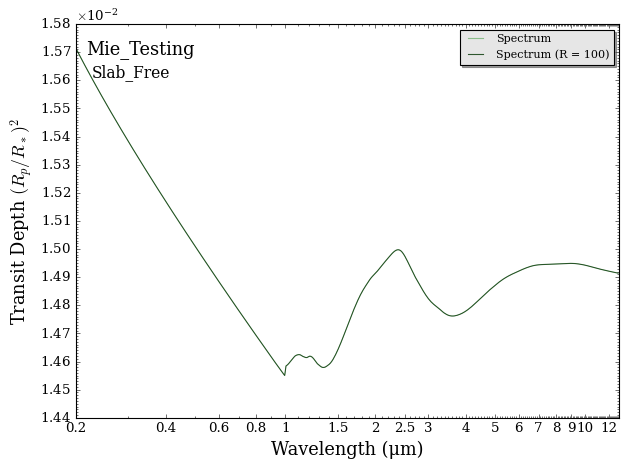

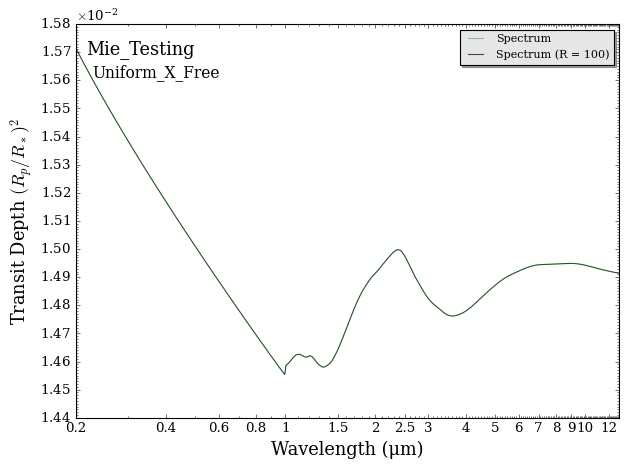

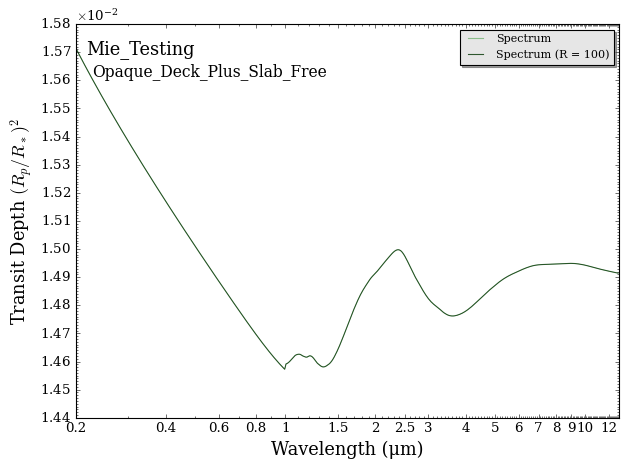

In [18]:
spectra = plot_collection(spectrum_1, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100,
                   plt_label = model_1_name) 


spectra = plot_collection(spectrum_2, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_2_name) 

spectra = plot_collection(spectrum_3, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_3_name) 

spectra = plot_collection(spectrum_4, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_4_name) 

spectra = plot_collection(spectrum_5, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_5_name) 

spectra = plot_collection(spectrum_6, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_6_name) 

spectra = plot_collection(spectrum_7, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_7_name) 

spectra = plot_collection(spectrum_8, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_8_name) 

spectra = plot_collection(spectrum_9, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_9_name) 

spectra = plot_collection(spectrum_10, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_10_name) 

spectra = plot_collection(spectrum_11, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_11_name) 

spectra = plot_collection(spectrum_12, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_12_name) 

spectra = plot_collection(spectrum_13, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_13_name) 

spectra = plot_collection(spectrum_14, wl, collection = [])
fig = plot_spectra(spectra, planet, R_to_bin = 100, 
                   plt_label = model_14_name) 

# PLT Clouds

In [ ]:
def plot_chem(planet, model, atmosphere, plot_species = [], 
              colour_list = [], show_profiles = [],
              log_X_min = None, log_X_max = None,
              log_P_min = None, log_P_max = None,
              legend_title = None, legend_location = 'upper right'):  
    ''' 
    Plot the mixing ratio profiles defining the atmosphere.
    
    The user specifies which chemical species to plot via the list
    'plot_species'. The colours used for each species can be specified
    by the user via 'colour_list', or else default colours will be used.
    This function supports plotting up to 8 chemical species.

    Args:
        planet (dict): 
            Dictionary containing planet properties.
        model (dict):
            Dictionary containing model properties.
        atmosphere (dict):
            Dictionary containing atmospheric properties.
        plot_species (list, optional):
            List of chemical species to plot. If not specified, default to all 
            chemical species in the model (including bulk species).
        colour_list (list, optional):
            List of colours to use for each species in plot_species.
            Default is a predefined list, if the user doesn't provide one.
        show_profiles (list, optional):
            List of chemical profiles to plot. Default is an empty list.
            For a 1D model, a single P-T profile is plotted. For 2D or 3D models,
            the user can specify the regions for which the P-T profiles should be
            plotted. This is handled through 'show_profiles'.
            Valid choices for 2D and 3D models:
                2D Day-Night: ['day', 'night', 'terminator']
                2D Evening-Morning: ['morning', 'evening', 'average']
                3D: ['evening-day', 'evening-night', 'evening-terminator', 
					 'morning-day', 'morning-night', 'morning-terminator',
					 'terminator-average']
            Any subset of the above can be passed via 'show_profiles'.
        log_X_min (float, optional):
            Minimum log10 mixing ratio to plot. If not specified, the range is 
            calculated automatically.
        log_X_max (float, optional):
            Minimum log10 mixing ratio to plot. If not specified, the range is 
            calculated automatically.
        log_P_min (float, optional):
            Minimum log10 pressure to plot. If not specified, the range is 
            calculated automatically.
        log_P_max (float, optional):
            Minimum log10 pressure to plot. If not specified, the range is 
            calculated automatically.
        legend_title (str, optional):
            Title for the legend. Defaults to the model name if not provided.
        legend_location (str, optional):
            Location of the legend. Default is 'upper right'.

        Returns:
            fig (matplotlib figure object):
                Chemical mixing ratio plot.

    '''
    
    # Unpack model and atmospheric properties
    planet_name = planet['planet_name']
    model_name = model['model_name']
    chemical_species = model['chemical_species']
    P = atmosphere['P']
    log_X = np.log10(atmosphere['X'])
    Atmosphere_dimension = model['Atmosphere_dimension']
    TwoD_type = model['TwoD_type']

    # Identify output directory location where the plot will be saved
    output_dir = './POSEIDON_output/' + planet_name + '/plots/'
    
    # If the user did not specify which species to plot, plot all of them
    if (len(plot_species) == 0):
        plot_species = chemical_species

    # Quick validity checks for plotting
    if (len(plot_species) > 8):
        raise Exception("Max number of concurrent species on plot is 8.\n"
                        "Please specify species to plot via plot_species = [LIST]")
    if ((colour_list != []) and (len(plot_species) != len(colour_list))):
        raise Exception("Number of colours does not match number of species.")
    for q, species in enumerate(plot_species):
        if (species not in chemical_species):
            raise Exception(species + " not included in this model.")

    # Find minimum and maximum mixing ratios in atmosphere
    if (log_X_min == None):
        log_X_min = -1
        for q, species in enumerate(plot_species):
            log_X_min = min(log_X_min, (np.floor(np.min(log_X[chemical_species == species,:,0,0][0])) - 1.0))

    if (log_X_max == None):
        log_X_max = -10
        for q, species in enumerate(plot_species):
            log_X_max = max(log_X_max, (min((np.ceil(np.max(log_X[chemical_species == species,:,0,0][0])) + 1.0), 0.0)))
    
    # When range is small, extend axes +/- 1 dex either side
    if (log_X_min == log_X_max):
        log_X_min = log_X_min - 1.0
        log_X_max = log_X_max + 1.0
        
    # Find range to plot
    log_X_range = log_X_max - log_X_min
    
    # Calculate appropriate axis spacing
    if (log_X_range <= 10):
        major_spacing = 1.0
    else:
        major_spacing = 2.0
    minor_spacing = major_spacing/10

    if (log_P_min == None):
        log_P_min = np.log10(np.min(P))
    if (log_P_max == None):
        log_P_max = np.log10(np.max(P))
    
    # Define colours for mixing ratio profiles (default or user choice)
    if (colour_list == []):   # If user did not specify a custom colour list
        colours = ['royalblue', 'darkgreen', 'magenta', 'crimson', 'darkgrey', 
                   'black', 'darkorange', 'navy']
    else:
        colours = colour_list
    
    # Find LaTeX code for each chemical species to plot
    latex_species = generate_latex_param_names(plot_species)
    
    # create figure
    fig = plt.figure()  
    ax = plt.gca()
    
    # Assign axis spacing
    xmajorLocator_X = MultipleLocator(major_spacing)
    xminorLocator_X = MultipleLocator(minor_spacing)
        
    ax.xaxis.set_major_locator(xmajorLocator_X)
    ax.xaxis.set_minor_locator(xminorLocator_X)
    
    # Plot mixing ratio profiles
    
    # 1D temperature profile
    if (Atmosphere_dimension == 1):

        for q, species in enumerate(plot_species):
            ax.semilogy(log_X[chemical_species == species,:,0,0][0], P, 
                        lw=1.5, color = colours[q], label=latex_species[q])

    # 2D temperature profile
    elif (Atmosphere_dimension == 2):
        
        if (len(show_profiles) == 0):
            raise Exception("For 2D or 3D models, you need to specify " +
                            "which regions to plot.")
        
        for q, species in enumerate(plot_species):

            # Day-Night gradient
            if (TwoD_type == 'D-N'):
                    
                # If dayside and nightside the same, only plot one profile
                if (np.all(log_X[chemical_species == species,:,0,0][0] ==
                           log_X[chemical_species == species,:,0,-1][0])):
                    ax.semilogy(log_X[chemical_species == species,:,0,0][0],
                                P, lw=1.5, ls='-', color = colours[q],
                                label=latex_species[q])

                # Do the same for bulk species
                elif (species in ['H2', 'He']):
                    ax.semilogy(log_X[chemical_species == species,:,0,0][0],
                                P, lw=1.5, ls='-', color = colours[q],
                                label=latex_species[q])
                
                # Otherwise, plot user choices
                else:
                    
                    for profile_to_plot in show_profiles:
                        
                        if (profile_to_plot not in ['day', 'night', 'terminator']):
                            print ("Ignoring invalid profile '" + profile_to_plot +
                                   "', since only 'day', 'night', and 'terminator' " +
                                   "are valid for a 2D day-night model.")

                        if (profile_to_plot == 'day'):
                            ax.semilogy(log_X[chemical_species == species,:,0,0][0], 
                                        P, lw=3.0, ls=':', color = colours[q], 
                                        label=latex_species[q] + ' (Day)')
                        if (profile_to_plot == 'night'):
                            ax.semilogy(log_X[chemical_species == species,:,0,-1][0], 
                                        P, lw=1.5, ls='--', color = colours[q],
                                        label=latex_species[q] + ' (Night)')
                        if (profile_to_plot == 'terminator'):
                            ax.semilogy(0.5*(log_X[chemical_species == species,:,0,0][0] +
                                             log_X[chemical_species == species,:,0,-1][0]), 
                                        P, lw=1.5, ls='-', color = colours[q],
                                        label=latex_species[q] + ' (Terminator)')
                            
            # Evening-Morning gradient
            elif (TwoD_type == 'E-M'):
                    
                # If evening and morning the same, only plot one profile
                if (np.all(log_X[chemical_species == species,:,0,0][0] ==
                           log_X[chemical_species == species,:,-1,0][0])):
                    ax.semilogy(log_X[chemical_species == species,:,0,0][0],
                                P, lw=1.5, ls='-', color = colours[q],
                                label=latex_species[q])

                # Do the same for bulk species
                elif (species in ['H2', 'He']):
                    ax.semilogy(log_X[chemical_species == species,:,0,0][0],
                                P, lw=1.5, ls='-', color = colours[q],
                                label=latex_species[q])
                
                # Otherwise, plot user choices
                else:
                    
                    for profile_to_plot in show_profiles:
                        
                        if (profile_to_plot not in ['evening', 'morning', 'average']):
                            print ("Ignoring invalid profile '" + profile_to_plot +
                                   "', since only 'evening', 'morning', and 'average' " +
                                   "are valid for a 2D evening-morning model.")
                            
                        if (profile_to_plot == 'evening'):
                            ax.semilogy(log_X[chemical_species == species,:,0,0][0], 
                                        P, lw=3.0, ls=':', color = colours[q], 
                                        label=latex_species[q] + ' (Evening)')
                        if (profile_to_plot == 'morning'):
                            ax.semilogy(log_X[chemical_species == species,:,-1,0][0], 
                                        P, lw=1.5, ls='--', color = colours[q],
                                        label=latex_species[q] + ' (Morning)')
                        if (profile_to_plot == 'average'):
                            ax.semilogy(0.5*(log_X[chemical_species == species,:,0,0][0] +
                                             log_X[chemical_species == species,:,-1,0][0]), 
                                        P, lw=1.5, ls='-', color = colours[q],
                                        label=latex_species[q] + ' (Average)')
  
    # 3D temperature profile
    elif (Atmosphere_dimension == 3):
        
        if (len(show_profiles) == 0):
            raise Exception("For 2D or 3D models, you need to specify " +
                            "which regions to plot.")
        
        for q, species in enumerate(plot_species):
            
            # If all profiles the same, only plot one profile
            if ((np.all(log_X[chemical_species == species,:,0,0][0] ==
                        log_X[chemical_species == species,:,-1,0][0])) and
                (np.all(log_X[chemical_species == species,:,0,0][0] ==
                       log_X[chemical_species == species,:,0,-1][0]))):
                ax.semilogy(log_X[chemical_species == species,:,0,0][0],
                            P, lw=1.5, ls='-', color = colours[q],
                            label=latex_species[q])
            
            # Otherwise, plot user choices
            else:

                for profile_to_plot in show_profiles:
                    
                    if (profile_to_plot not in ['evening-day', 'evening-night', 
                                                'evening-terminator', 'morning-day',
                                                'morning-night', 'morning-terminator',
                                                'terminator-average']):
                        print ("Ignoring invalid profile '" + profile_to_plot +
                               "', since only combinations of 'evening-' or 'morning-' " +
                               "and 'day', 'night', or 'terminator' are valid for " +
                               "a 3D model. A global average can be plotted via " +
                               "'terminator-average'.")
                        
                    if (profile_to_plot == 'evening-day'):
                        ax.semilogy(log_X[chemical_species == species,:,0,0][0], 
                                    P, lw=1.5, ls=linestyles['loosely dashed'], color = colours[q], 
                                    label=latex_species[q] + ' (Evening: Day)')
                    if (profile_to_plot == 'evening-night'):
                        ax.semilogy(log_X[chemical_species == species,:,0,-1][0], 
                                    P, lw=1.5, ls=linestyles['dashed'], color = colours[q], 
                                    label=latex_species[q] + ' (Evening: Night)')
                    if (profile_to_plot == 'evening-terminator'):
                        ax.semilogy(0.5*(log_X[chemical_species == species,:,0,0][0] +
                                         log_X[chemical_species == species,:,0,-1][0]), 
                                    P, lw=1.5, ls=linestyles['densely dashed'], color = colours[q], 
                                    label=latex_species[q] + ' (Evening: Terminator)')
                    if (profile_to_plot == 'morning-day'):
                        ax.semilogy(log_X[chemical_species == species,:,-1,0][0], 
                                    P, lw=1.5, ls=linestyles['loosely dashdotted'], color = colours[q], 
                                    label=latex_species[q] + ' (Morning: Day)')
                    if (profile_to_plot == 'morning-night'):
                        ax.semilogy(log_X[chemical_species == species,:,-1,-1][0], 
                                    P, lw=1.5, ls=linestyles['dashdotted'], color = colours[q], 
                                    label=latex_species[q] + ' (Morning: Night)')
                    if (profile_to_plot == 'morning-terminator'):
                        ax.semilogy(0.5*(log_X[chemical_species == species,:,-1,0][0] + 
                                         log_X[chemical_species == species,:,-1,-1][0]), 
                                    P, lw=1.5, ls=linestyles['densely dashdotted'], color = colours[q], 
                                    label=latex_species[q] + ' (Morning: Terminator)')
                    if (profile_to_plot == 'terminator-average'):
                        ax.semilogy(0.25*(log_X[chemical_species == species,:,0,0][0] + 
                                          log_X[chemical_species == species,:,0,-1][0] + 
                                          log_X[chemical_species == species,:,-1,0][0] + 
                                          log_X[chemical_species == species,:,-1,-1][0]), 
                                    P, lw=1.5, ls=linestyles['dotted'], color = colours[q], 
                                    label=latex_species[q] + ' (Terminator Average)')
  
    # Common plot settings for all profiles
    ax.invert_yaxis()            
    ax.set_xlabel(r'Mixing Ratios (log $X_{\rm{i}}$)', fontsize = 20)
    ax.set_xlim(log_X_min, log_X_max)  
    ax.set_ylabel(r'Pressure (bar)', fontsize = 20)
    ax.set_ylim(np.power(10.0, log_P_max), np.power(10.0, log_P_min))  
    ax.tick_params(labelsize=12)

    # Add legend
    legend = ax.legend(loc=legend_location, shadow=True, prop={'size':14}, 
                       frameon=True, columnspacing=1.0, title = legend_title,
                       title_fontsize = 16)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

    if (legend_location == 'upper left'):
        legend.set_bbox_to_anchor([0.02, 0.98], transform=None)
    elif (legend_location == 'upper right'):
        legend.set_bbox_to_anchor([0.98, 0.98], transform=None)
    elif (legend_location == 'lower left'):
        legend.set_bbox_to_anchor([0.02, 0.02], transform=None)
    elif (legend_location == 'lower right'):
        legend.set_bbox_to_anchor([0.98, 0.98], transform=None)
    
    fig.set_size_inches(9.0, 9.0)

    # Write figure to file
    file_name = output_dir + planet_name + '_' + model_name + '_chem.pdf'

    plt.savefig(file_name, bbox_inches='tight')

    return fig

# Retrieval Tests

In [14]:
print(1/0)

ZeroDivisionError: division by zero

In [ ]:
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J, M_J
import scipy.constants as sc

#
#***** Define stellar properties *****#

# Stassun et al 2017
R_s = 1.49*R_Sun     # Stellar radius (m)
T_s = 6550            # Stellar effective temperature (K)
Met_s = -0.25          # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.2        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s)

#***** Define planet properties *****#

planet_name = 'WASP-17b'  # Planet name used for plots, output files etc.

# Taken from Stassun et al 2017
R_p = 1.87*R_J                           # Planetary radius (m)
M_p = 0.78*M_J
# Formula : a = GM/R^2
g_p = (sc.G*M_p)/(R_p**2)         # Gravitational field of planet (m/s^2)

# Barstow et al 2017
T_eq = 1738       # Equilibrium temperature (K)

# Create the planet object
planet = create_planet(planet_name, R_p, gravity = g_p, T_eq = T_eq)

from POSEIDON.core import load_data, wl_grid_constant_R
from POSEIDON.visuals import plot_data

wl_min = 0.2     # Minimum wavelength (um)
wl_max = 13      # Maximum wavelength (um)
R = 1000         # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

#***** Specify data location and instruments  *****#

from POSEIDON.core import load_data, wl_grid_constant_R
from POSEIDON.visuals import plot_data

#***** Specify data location and instruments  *****#
data_dir = '.' 

datasets = ['Wasp-17b-bin025-ExoTiC',
            'W17_pre_Jwst_data.txt']
instruments = ['JWST_MIRI_LRS',
               'None']

# Load dataset, pre-load instrument PSF and transmission function
data = load_data(data_dir, datasets, instruments, wl,
                 offset_datasets = ['Wasp-17b-bin025-ExoTiC'])

#***** Define models *****#
from POSEIDON.core import define_model

model_name = 'Slab_SiO2_Test'

bulk_species = ['H2', 'He']      # H2 + He comprises the bulk atmosphere
param_species = ['H2O', 'CH4', 'CO2', 'Na', 'K', 'CO']
aerosol_species = ['SiO2']

# Create the model object
model = define_model(model_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'slab',
                     aerosol_species = aerosol_species,
                     offsets_applied= 'single_dataset')

from POSEIDON.core import set_priors

#***** Set priors for retrieval *****#

log_r_m_string = 'log_r_m_' + aerosol_species[0]
log_X_string = 'log_X_' + aerosol_species[0]
log_P_cloud_string = 'log_P_cloud_' + aerosol_species[0]
Delta_log_P_string = 'Delta_log_P_' + aerosol_species[0]

# Initialise prior type dictionary
prior_types = {}

# Specify whether priors are linear, Gaussian, etc.
prior_types['T'] = 'uniform'
prior_types['R_p_ref'] = 'uniform'

prior_types['log_X'] = 'uniform'

prior_types['delta_rel'] = 'uniform'

prior_types[log_r_m_string] = 'uniform'
prior_types[log_X_string] = 'uniform'
prior_types[log_P_cloud_string] = 'uniform'
prior_types[Delta_log_P_string] = 'uniform'

prior_ranges = {}

# Specify prior ranges for each free parameter
prior_ranges['T'] = [400, 2300]
prior_ranges['R_p_ref'] = [1.5895*R_J, 2.1505*R_J]
prior_ranges['log_X'] = [-12, -1]
prior_ranges['delta_rel'] = [-1000, 1000]

prior_ranges[log_r_m_string] = [-3,1]
prior_ranges[log_X_string] = [-30,-1]
prior_ranges[log_P_cloud_string] = [-7,2]
prior_ranges[Delta_log_P_string] = [0,9]

priors = set_priors(planet, star, model, data, prior_types, prior_ranges)

from POSEIDON.core import read_opacities
import numpy as np

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 400     # Same as prior range for T
T_fine_max = 2300    # Same as prior range for T
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step),
                       log_P_fine_step)

# Pre-interpolate the opacities
opac = read_opacities(model, wl, opacity_treatment, T_fine, log_P_fine)

from POSEIDON.retrieval import run_retrieval

# Specify the pressure grid of the atmosphere
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# We'll space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure and radius
P_ref = 10.0   # Reference pressure (bar)

run_retrieval(planet, star, model, opac, data, priors, wl, P, P_ref, R = R,
              spectrum_type = 'transmission', sampling_algorithm = 'MultiNest',
              N_live = 50, verbose = True)

/Users/elijahmullens/Desktop/POSEIDON-V1-1/POSEIDON/absorption.py:1479: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def store_Rayleigh_eta_LBL(wl_model, chemical_species):


POSEIDON does not currently have an instrument transmission function for None, so a box function will be used.
Reading in database for aerosol cross sections...
Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
H2-CH4 done
CO2-H2 done
CO2-CO2 done
CO2-CH4 done
H2O done
CH4 done
CO2 done
Na done
K done
CO done
Opacity pre-interpolation complete.
POSEIDON now running 'Slab_SiO2_Test'
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =   50
 dimensionality =   13
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.813008
Replacements:                                100
Total Samples:                               123
Nested Sampling ln(Z):              -6446.289928
Acceptance Rate:                        0.721154
Replacements:           

Generating corner plot ...


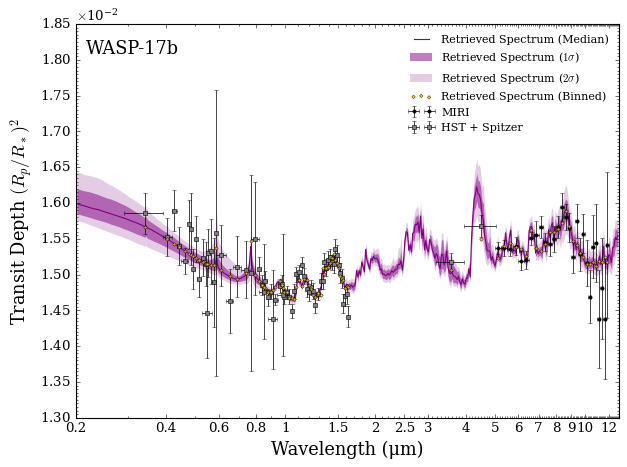

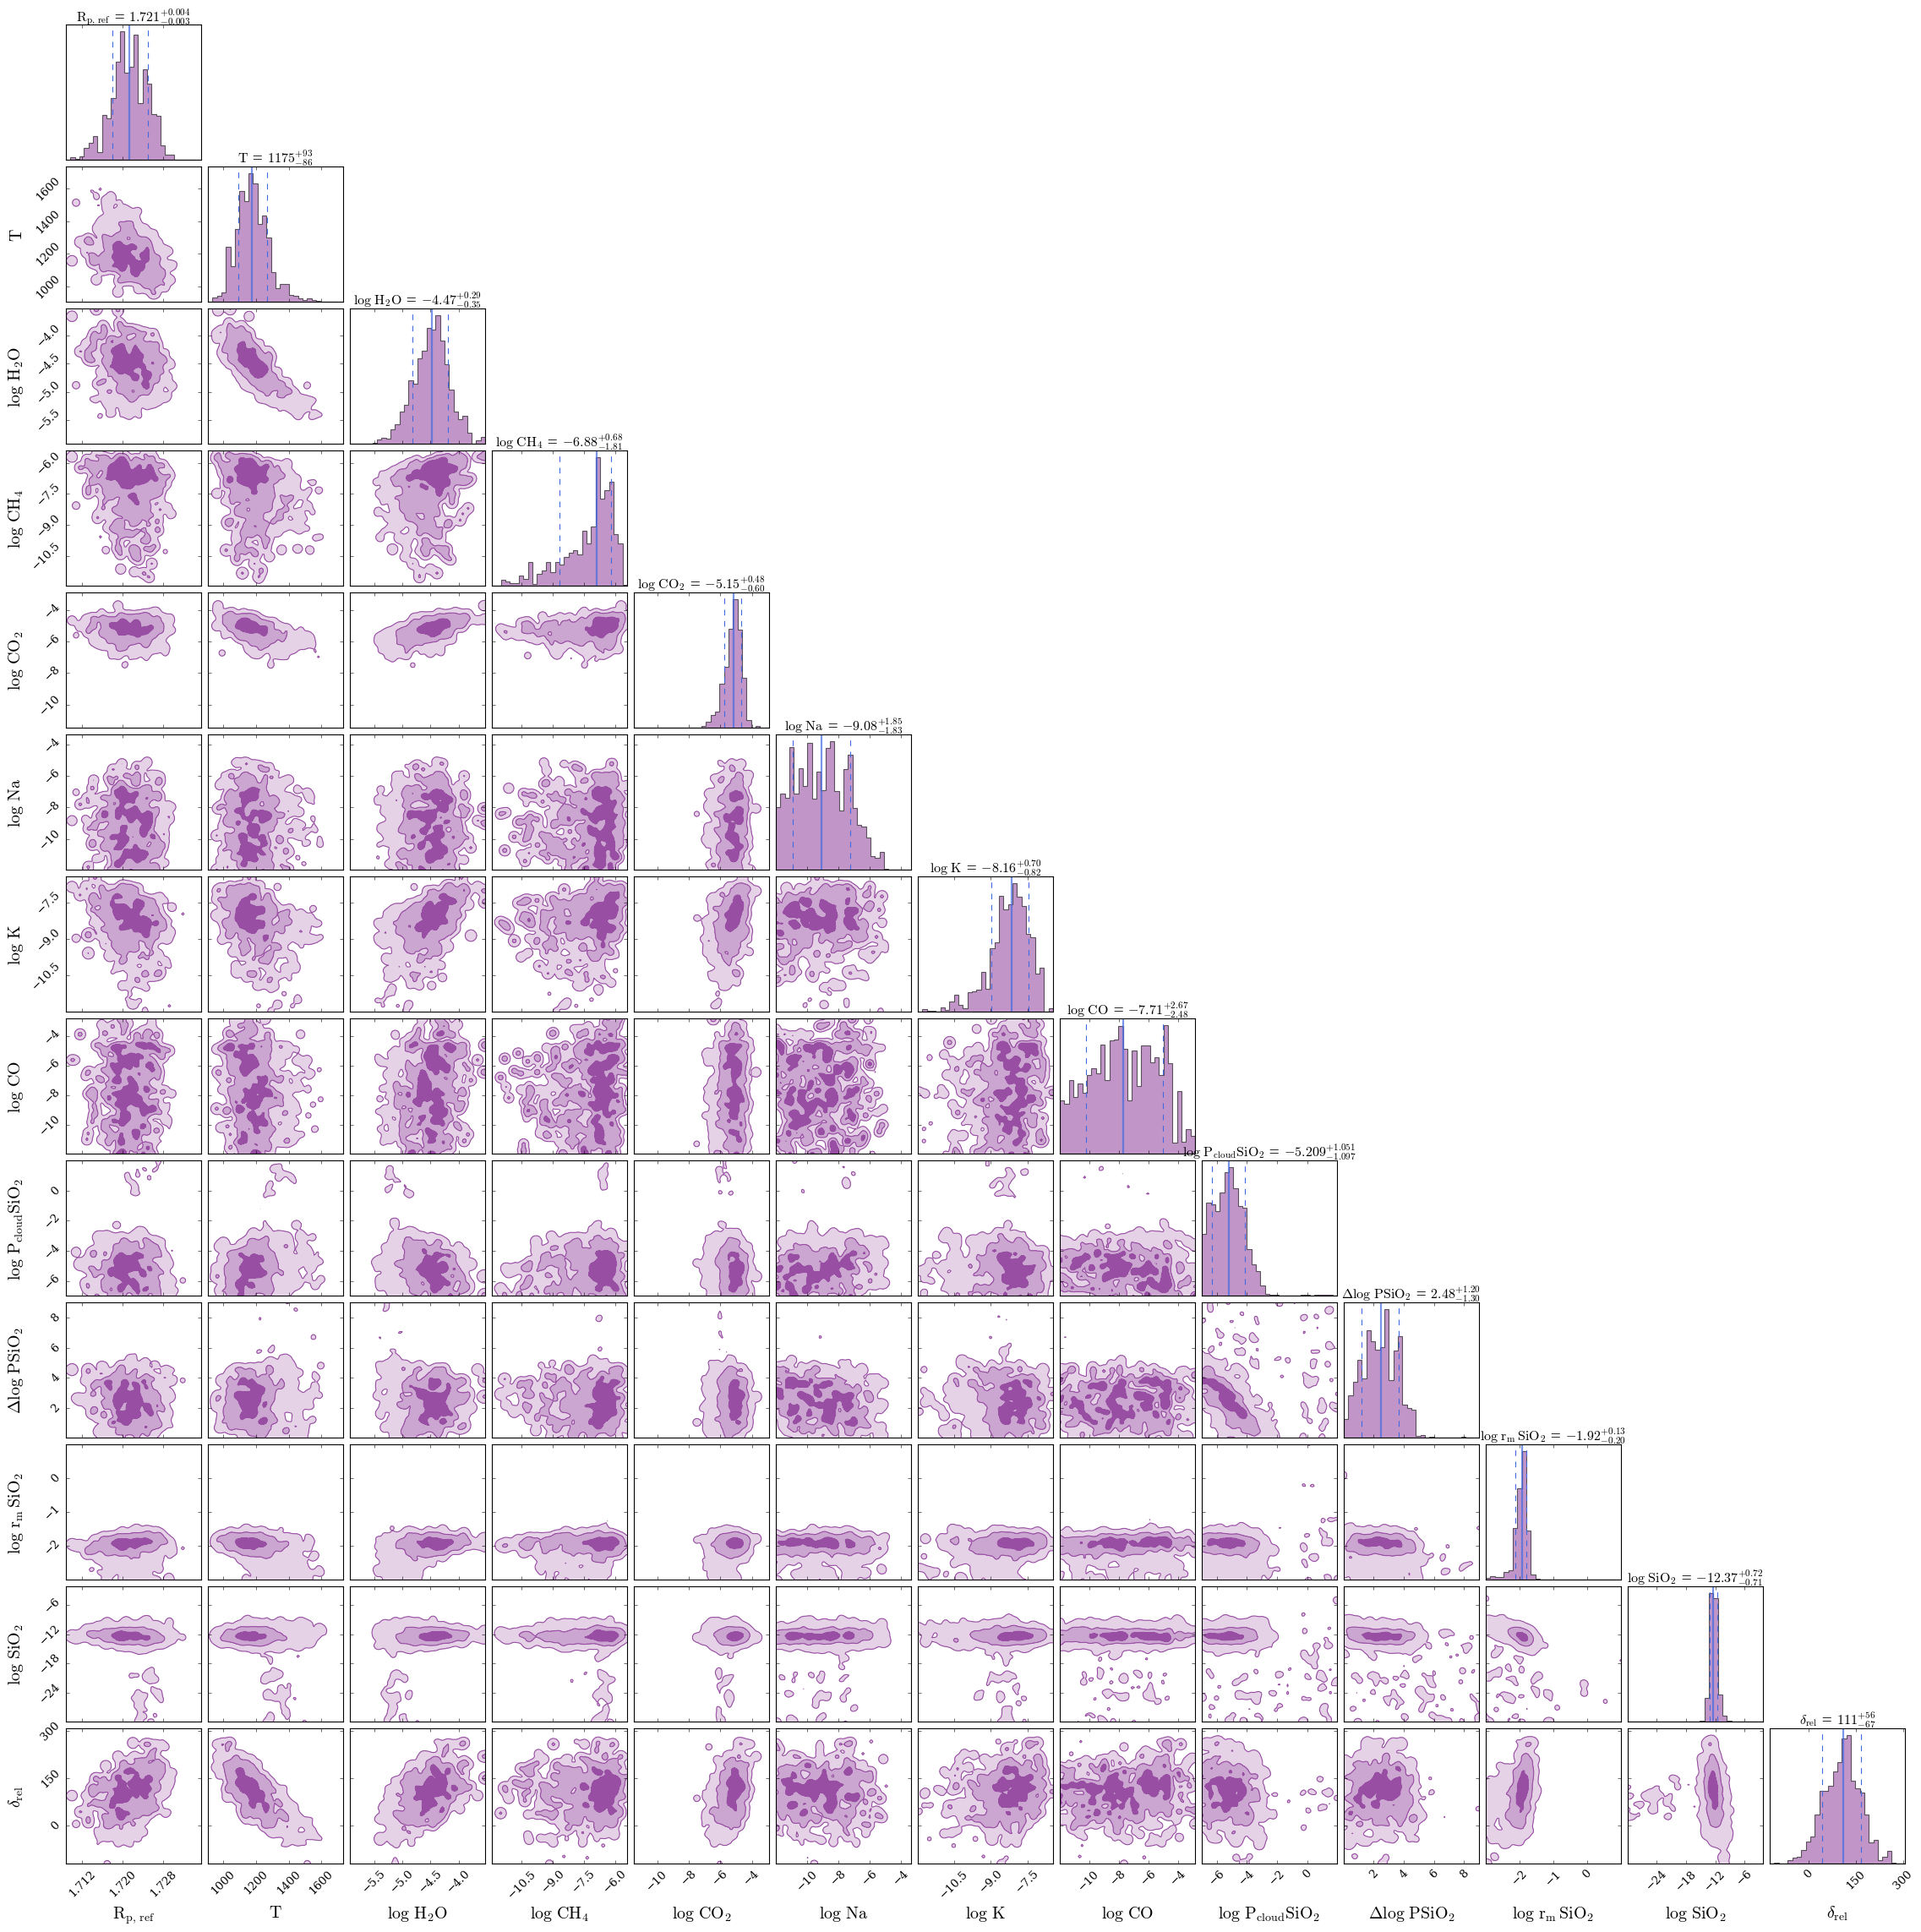

In [ ]:
from POSEIDON.utility import read_retrieved_spectrum, plot_collection
from POSEIDON.visuals import plot_spectra_retrieved
from POSEIDON.corner import generate_cornerplot

#***** Plot retrieved transmission spectrum *****#

ydata = data['ydata']                 # Transit depths from the data files
offset_start = data['offset_start']   # Index where WFC3 data starts
offset_end = data['offset_end']       # Index where WFC3 data ends

offset = 105.64
offset = offset * 1e-6
# Apply median retrieved offset to the WFC3 data
ydata[offset_start:offset_end] -= offset

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name)

# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

# Produce figure
fig_spec = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                                  spectra_high1, spectra_high2, planet_name,
                                  data, R_to_bin = 100,
                                  data_labels = ['MIRI', 'HST + Spitzer'],
                                  data_colour_list = ['black', 'gray',])

#***** Make corner plot *****#

fig_corner = generate_cornerplot(planet, model)

ydata[offset_start:offset_end] += offset